In [2]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point
import os
import folium
import json

In [3]:
df = pd.read_csv("raw_data.csv")
df_restaurant = pd.read_csv("restaurants_raw_data.csv")
#Keeping only one record for each restaurant
df["inspection_date_datetime"] = pd.to_datetime(df["inspection_date"])
df = df.sort_values("inspection_date_datetime",ascending=False)
df = df.drop_duplicates("camis")
df = df[df["grade"].notnull()]
df_restaurant = df_restaurant.drop_duplicates(["dba","street","zipcode"])
df_merged = df.merge(df_restaurant, on=["dba","street","zipcode"],how="left")

In [67]:
df_map = df_map.dropna(subset=['zipcode'])
df_map.zipcode.unique()
df_map["zipcode"] = df_map["zipcode"].astype(int)
df = df_map.groupby("zipcode")["score"].mean() 
new_df = pd.DataFrame(data = {"zip": df.index, "mean_score": df}) 

In [86]:
df_proportion =  100*(df_map[df_map["score"] < 13].groupby("zipcode")["score"].count() / df_map.groupby("zipcode")["score"].count())
new_df = pd.DataFrame(data = {"zip": df.index,"proportion": df_proportion}) 
new_df["zip"] = new_df["zip"].astype(str)

In [48]:
with open("nyc-zip-code-tabulation-areas-polygons.geojson","r") as jsonFile:
    data = json.load(jsonFile)
tmp = data
geozips = []
for i in range(len(tmp["features"])):
    if tmp["features"][i]["properties"]["postalCode"] in list(new_df["zip"].unique().astype(str)):
        geozips.append(tmp["features"][i])
        
new_json = dict.fromkeys(["type","features"])
new_json["type"] = "FeatureCollection"
new_json["features"] = geozips

open("updated-file.json","w").write(json.dumps(new_json, sort_keys = True, indent=4, separators = (",",": ")))

1749713

In [149]:
def create_map(table,zips,mapped_feature, add_text=""):
    nyc_geo = r"updated-file.json"
    m = folium.Map(location = [40.7128, -74.0060], zoom_start = 11)
    m.choropleth(
        geo_data = nyc_geo,
        fill_opacity = 0.7,
        line_opacity = 0.2,
        data = table,
        key_on = "feature.properties.postalCode",
        columns = [zips,mapped_feature],
        fill_color = "RdYlGn",
        legend_name = "Percentage of Restaurants Graded A Across NYC",
        threshold_scale= [50, 60, 70, 80, 90, 100]
    )
    folium.LayerControl().add_to(m)
    m.save(outfile = mapped_feature + "_map.html")

In [150]:
create_map(new_df,"zip","proportion")

In [ ]:
'''os.environ["PROJ_LIB"] = "C:\ProgramData\Anaconda3\Library\share"
df_map = df_for_map[["score","yelp_latitude","yelp_longitude"]]
df_map = df_map[(df_map["yelp_longitude"] >= -74.257159) & (df_map["yelp_longitude"]  <= -73.699215)]
df_map = df_map[(df_map["yelp_latitude"] >= 40.495992) & (df_map["yelp_latitude"]  <= 40.915568)]
df_map['Coordinates'] = list(zip(df_map.yelp_longitude, df_map.yelp_latitude))
df_map['Coordinates'] = df_map['Coordinates'].apply(Point)

df =df_map[["score","Coordinates"]]
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')
gdf.crs = {'init': 'epsg:4326', 'no_defs': True}
nybb_path = geopandas.datasets.get_path('nybb')
boros = geopandas.read_file(nybb_path)
gdf.to_crs(boros.crs, inplace=True)
manhattan = boros.geometry[3]
brooklyn = boros.geometry[2]
in_mn = gdf.geometry.within(manhattan)
ax = boros.plot()
gdf[in_mn].plot(ax=ax,column="score",edgecolor='black', scheme='quantiles',cmap='Blues')
plt.show()
'''

In [91]:
df = pd.read_csv("raw_data.csv")
df_restaurant = pd.read_csv("restaurants_raw_data.csv")
#Keeping only one record for each restaurant
df["inspection_date_datetime"] = pd.to_datetime(df["inspection_date"])
df = df.sort_values("inspection_date_datetime",ascending=False)
df = df.drop_duplicates("camis")
df = df[df["grade"].notnull()]
df_restaurant = df_restaurant.drop_duplicates(["dba","street","zipcode"])
df_merged = df.merge(df_restaurant, on=["dba","street","zipcode"],how="left")

,action,boro,building,camis,critical_flag,cuisine_description,dba,grade,grade_date,inspection_date,...,yelp_id,yelp_price,yelp_rating,yelp_review_count,yelp_latitude,yelp_longitude,yelp_name,yelp_is_claimed,yelp_hours,yelp_transaction_type
0,Violations were cited in the following area(s).,BROOKLYN,5507,50084316,Not Critical,Chinese,KIM ESS DOO,Not Yet Graded,NaN,2018-11-01T00:00:00.000,...,lWOkeS-wV4no8qqA9OwwEg,$$,4.5,3067.0,40.716394,-73.988610,Doughnut Plant,True,"[{'open': [{'is_overnight': False, 'start': '0...",NaN
1,Violations were cited in the following area(s).,MANHATTAN,248,50080780,Critical,Chinese,KOKO WINGS,A,2018-11-01T00:00:00.000,2018-11-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Violations were cited in the following area(s).,BROOKLYN,2187,50080912,Not Critical,American,J AND C RESTAURANT,Z,2018-11-01T00:00:00.000,2018-11-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Violations were cited in the following area(s).,BROOKLYN,179,50009557,Not Critical,American,GRAND CANYON DINER,A,2018-11-01T00:00:00.000,2018-11-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Violations were cited in the following area(s).,QUEENS,7,50074615,Not Critical,Sandwiches,ALASKA LOUNGE,Not Yet Graded,NaN,2018-11-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Violations were cited in the following area(s).,QUEENS,9004,50084318,Not Critical,Other,TACO MIX,Not Yet Graded,NaN,2018-11-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Violations were cited in the following area(s).,MANHATTAN,110,50075902,Critical,CafÃ©/Coffee/Tea,VOYAGER ESPRESSO,A,2018-11-01T00:00:00.000,2018-11-01T00:00:00.000,...,qzdCvtgpCDjNVV_zRJB5EQ,$,4.5,100.0,40.708897,-74.006676,Voyager Espresso,True,"[{'open': [{'is_overnight': False, 'start': '0...",delivery;pickup
7,Violations were cited in the following area(s).,BROOKLYN,310,50003089,Not Critical,Mexican,FATTY DADDY TACOS,A,2018-11-01T00:00:00.000,2018-11-01T00:00:00.000,...,t2nLcM6iuDDtBFfBbUI4_g,$,4.0,318.0,40.669172,-73.986665,Fatty Daddy Taco,True,"[{'open': [{'is_overnight': False, 'start': '1...",delivery;pickup
8,Violations were cited in the following area(s).,QUEENS,NaN,50079558,Critical,CafÃ©/Coffee/Tea,DUNKIN DONUTS,A,2018-11-01T00:00:00.000,2018-11-01T00:00:00.000,...,yG7WYcBIluHh7xU034l9Kg,$$,3.0,2.0,40.643211,-73.781952,Dunkin' Donuts,False,"[{'open': [{'is_overnight': True, 'start': '00...",NaN
9,Violations were cited in the following area(s).,STATEN ISLAND,752,50034716,Critical,Chinese,GREEN GARDEN,A,2018-11-01T00:00:00.000,2018-11-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000231ADDD6358>],
      dtype=object)

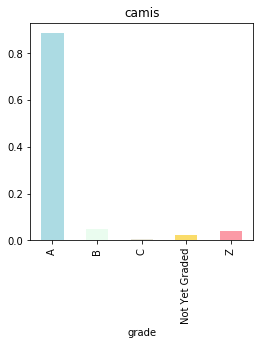

In [126]:
palette =["#acdbe3", "#eafcef","#e7e5d9","#fadc6a","#fb9aa6"]
#Aggregate Stats by Grade
plot1df = df_merged.groupby("grade")["camis"].count() / df_merged.groupby("grade")["camis"].count().sum()
plot1df.plot(kind="bar", subplots = True, figsize=(4,4), color=palette)

In [153]:
def is_food(cuisine_description):
    food = ["American","Peruvian","Soups & Sandwiches","Chinese","Sandwiches","Mexican","Chicken","Turkish","Sandwiches/Salads/Mixed Buffet","Hamburgers","Chinese/Japanese","Italian","Spanish","Latin (Cuban, Dominican, Puerto Rican, South & Central American)","French","Pizza/Italian","Creole","Pizza","Japanese","Seafood","Asian","African","Barbecue","Jewish/Kosher","Tapas","Caribbean","Salads","Steak","Tex-Mex","Mediterranean","Pakistani","Irish","Vegetarian","Bangladeshi","Australian","Thai","Soups","Middle Eastern","Russian","Indian","Brazilian","Greek","Korean","Vietnamese/Cambodian/Malaysia","Hotdogs","Hawaiian","Soul Food", "Filipino","Creole/Cajun","Eastern European","Armenian","Afghan","Chinese/Cuban","English","Polish","Continental","Hotdogs/Pretzels","German","Egyptian","Indonesian","Ethiopian","Moroccan","Portuguese","Californian","Cajun","Scandinavian","Southwestern","Chilean","Iranian","Polynesian","Czech","Basque"]
    other = ["Pancakes/Waffles","Not Listed/Not Applicable","Nuts/Confectionary","Fruits/Vegetables"]
    if cuisine_description in food:
        category = "Food"
    elif cuisine_description in other:
        category = "Other"
    else:
        category = cuisine_description
    
    return category

In [154]:
#Is there any distinction by cuisine?
food_type = df_merged["cuisine_description"].unique()
df_merged["food"] = df_merged["cuisine_description"].apply(is_food)

food
Bagels/Pretzels                                              149
Bakery                                                       660
Bottled beverages, including water, sodas, juices, etc.       96
CafÃ©/Coffee/Tea                                            1568
Delicatessen                                                 257
Donuts                                                       513
Food                                                       18796
Ice Cream, Gelato, Yogurt, Ices                              313
Juice, Smoothies, Fruit Salads                               375
Other                                                        287
Name: camis, dtype: int64

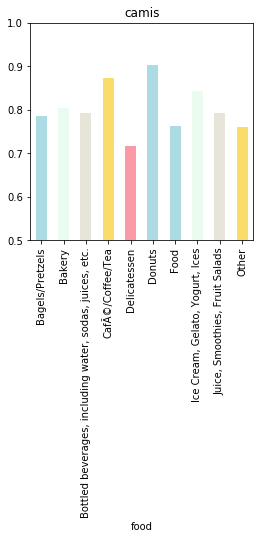

In [155]:
plot2df = df_merged[df_merged["score"] < 13].groupby("food")["camis"].count() / df_merged.groupby("food")["camis"].count()
plot2df.plot(kind="bar", subplots = True, figsize=(4,4),color=palette,ylim = (0.5,1))
df_merged.groupby("food")["camis"].count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000231B03D40F0>],
      dtype=object)

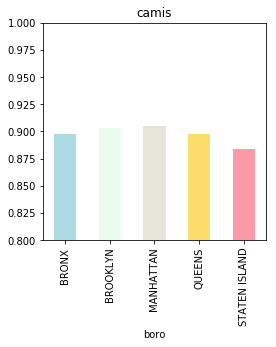

In [147]:
#Is there any distinction by Borough?
df_boro = df_merged[df_merged["boro"] != "Missing"]
plot2df = df_boro[df_merged["score"] < 14].groupby("boro")["camis"].count() / df_boro.groupby("boro")["camis"].count()
plot2df.plot(kind="bar", subplots = True, figsize=(4,4),ylim = (0.8,1),color=palette)

In [ ]:
#Is there any distinction by Number of Inspections?

In [ ]:
#Is there any distinction by number of reviews?

In [ ]:
#Is there any distinction by price point?

In [ ]:
#Is there any distinction by hours of opening?

In [ ]:
#Is there any distinction by being a chain?